# 모듈

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import missingno as msno
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

%matplotlib inline

rc('font', family='Malgun Gothic')
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../data/train.csv/train.csv')
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


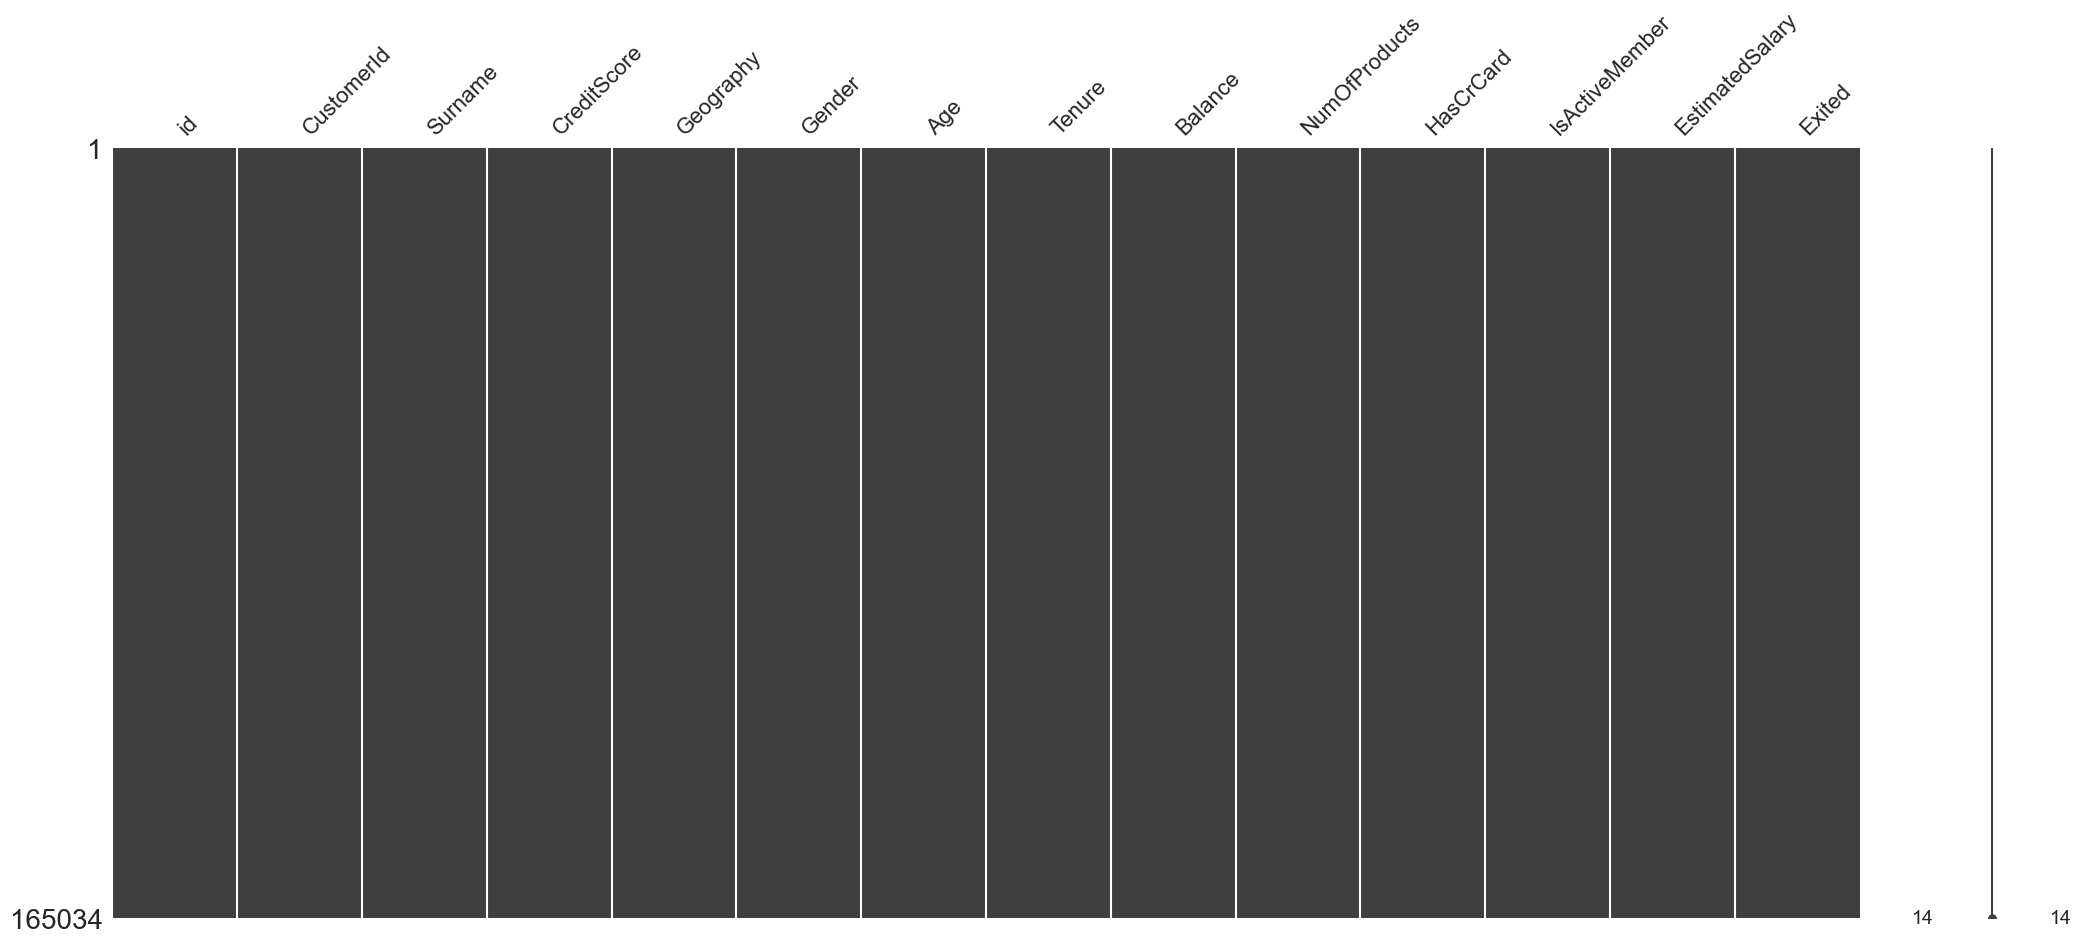

In [4]:
msno.matrix(df)
plt.show()

# 특성 
- id : 데이터 id
- CustomerId : 고객별 고유 ID
- Surnmae : 고객의 성(이름)
- CreditScore : 신용점수
- Geography : 고객이 거주하고 있는 나라
- Gender : 성별(남, 녀)
- Age : 나이
- Tenure : 은행과의 거래 기간
- Balance : 계좌 잔고
- NumOfProducts : 이용하는 은행 상품 수
- HasCrCard : 신용카드 보유 여부(1=yes, 0=no)
- IsActiveMember : 활성 회원 여부(1=활성, 0=비솰성)
- EstimatedSalary : 추정 연봉
- Exited : 이탈 여부(1=이탈, 0=비이탈)
---
- HasCrCard, IsActiveMember는 숫자로 되어 있지만 실질적으로는 범주형 데이터로 고려해야 함
- id, CustomerID, Surname은 데이터를 특정하고 분석에 의미를 갖지 않기 때문에 분석에서 제외

> 범주형 데이터
- Geography, Gender, HasCrCard, IsActiveMember
> 수치형 데이터
- CreditScore, Age, Tenure, Balance, EstimatedSalary
> 타겟
- Exited


- 중복 데이터 확인

In [5]:
df.duplicated().sum()

0

- id, CustomerId, Surname 제거

In [6]:
ids = df['id']
df.drop(['id', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# 데이터 확인

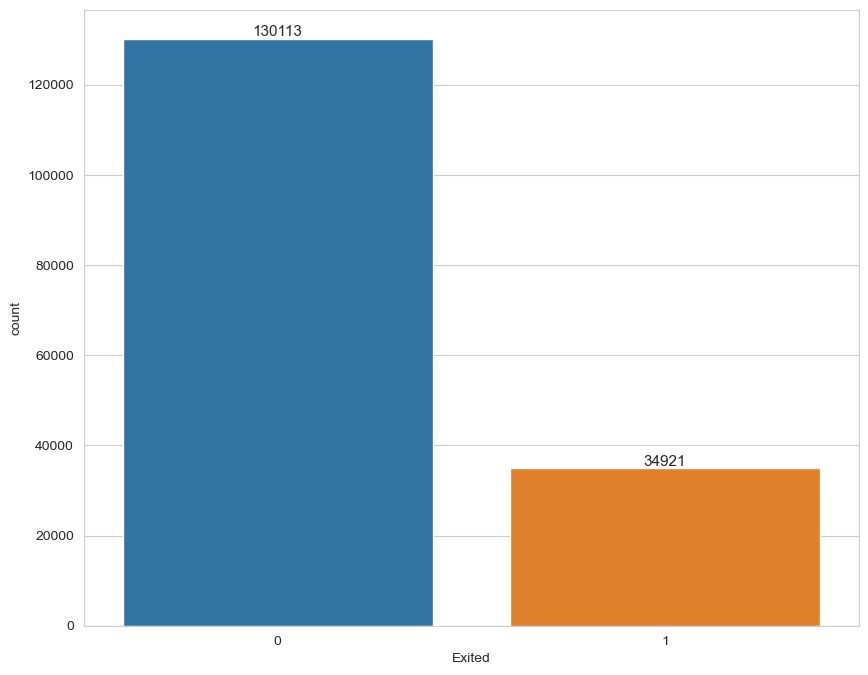

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='Exited', data=df)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=11)
plt.show()

In [9]:
print(f"전체 데이터 중 이탈 고객의 비율은 {round(len(df[df['Exited']==1]) / len(df), 4) * 100}% 입니다")

전체 데이터 중 이탈 고객의 비율은 21.16% 입니다


In [10]:
def draw_countplot(x, hue, figsize=(10, 8)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(x=x, hue=hue, data=df)
    ax.bar_label(ax.containers[0], label_type='edge', fontsize=11)
    ax.bar_label(ax.containers[1], label_type='edge', fontsize=11)
    plt.show()

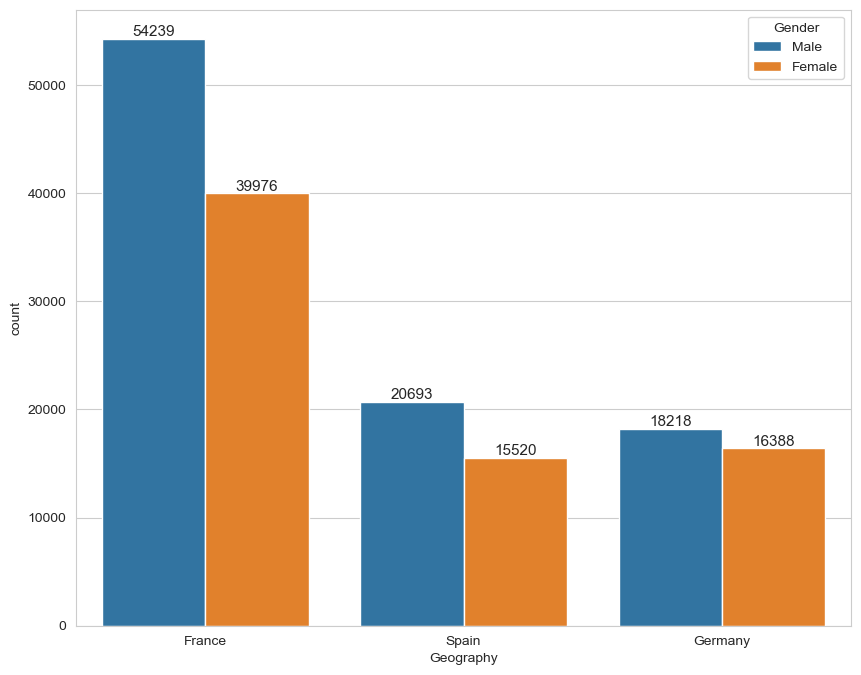

In [11]:
draw_countplot('Geography', 'Gender', figsize=(10, 8))

C:\Users\mase8\AppData\Local\Temp\ipykernel_23736\2363355163.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', len(col1_values))


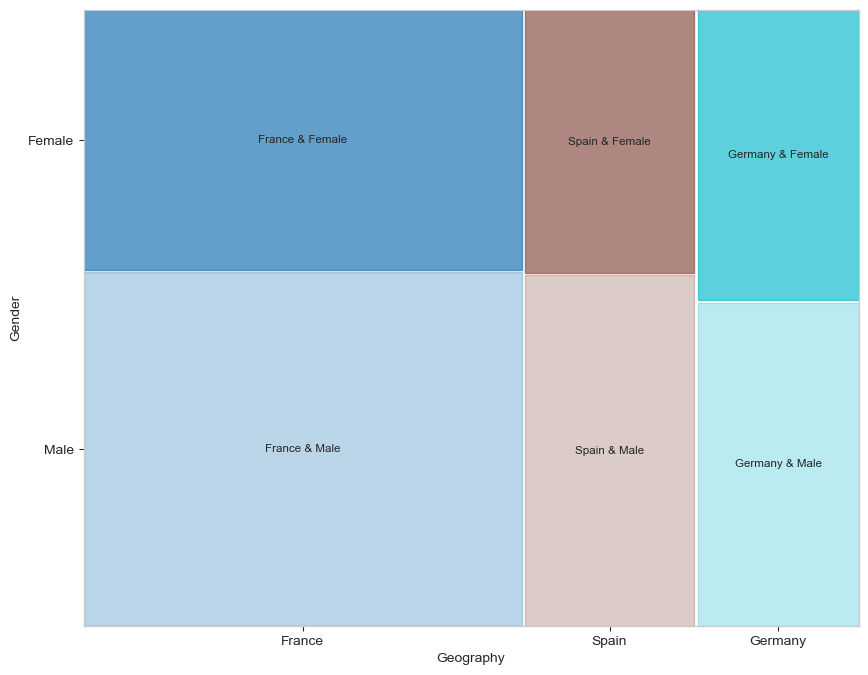

In [12]:
def create_mosaic_plot(df, col1, col2):
    col1_values = df[col1].unique()
    col2_values = df[col2].unique()

    color_palette = plt.cm.get_cmap('tab10', len(col1_values))
    colors = {str(val): color_palette(i) for i, val in enumerate(col1_values)}
    
    alphas = np.linspace(0.3, 0.7, len(col2_values))
    alpha_dict = {str(val): alpha for val, alpha in zip(col2_values, alphas)}
    
    def props(key):
        color = colors.get(str(key[0]), (0, 0, 0))
        alpha = alpha_dict.get(str(key[1]), 1)
        return {'color': color[:3] + (alpha,)}

    def labels(key):
        lab1 = {str(val): str(val) for val in col1_values}
        lab2 = {str(val): str(val) for val in col2_values} if col2 != 'Exited' else {'1': 'exited', '0': 'not exited'}

        label = f'{lab1.get(key[0], "unknown")} & {lab2.get(key[1], "unknown")}'
        return label

    fig, ax = plt.subplots(figsize=(10, 8))
    mosaic(df, [col1, col2], properties=props, labelizer=labels, ax=ax)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.grid(False)
    plt.show()

create_mosaic_plot(df, 'Geography', 'Gender')

- 고객들의 거주국가는 프랑스가 제일 많고, 데이터는 여성에 비해 남성이 좀 더 높은 비중을 차지

C:\Users\mase8\AppData\Local\Temp\ipykernel_23736\2363355163.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', len(col1_values))


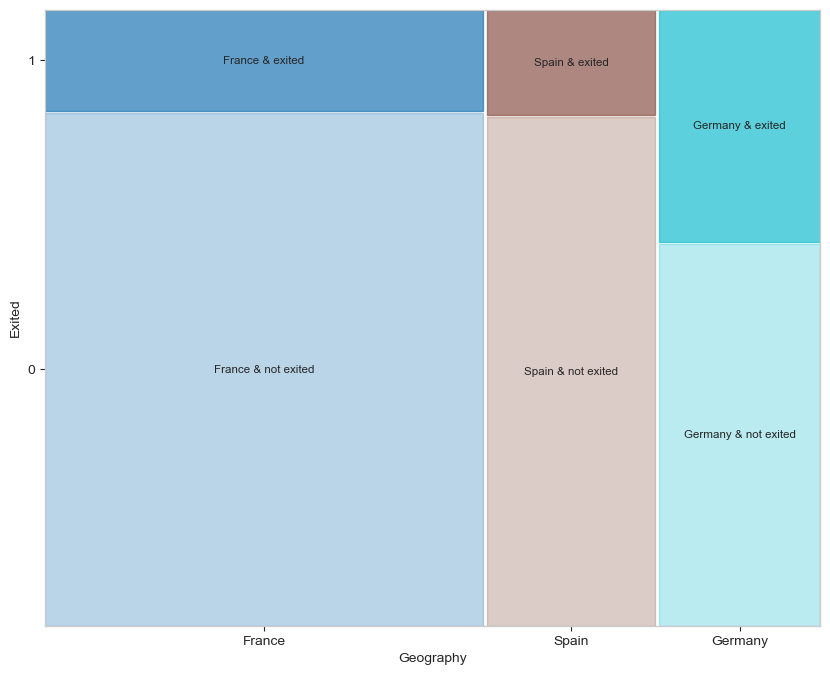

In [13]:
create_mosaic_plot(df, 'Geography', 'Exited')

- 독일이 이탈 고객 비중이 높음

C:\Users\mase8\AppData\Local\Temp\ipykernel_23736\2363355163.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', len(col1_values))


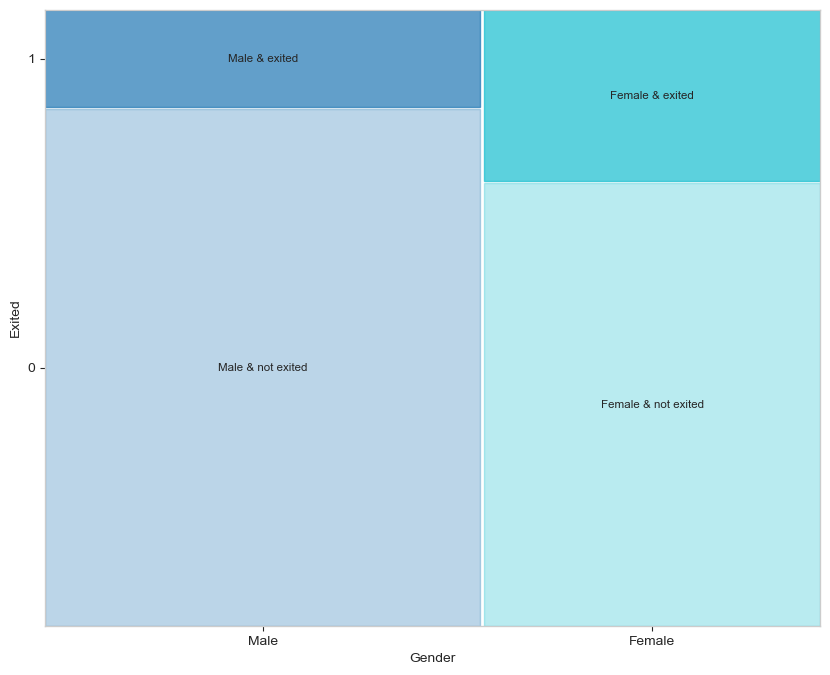

In [14]:
create_mosaic_plot(df, 'Gender', 'Exited')

- 여성고객이 이탈 비율이 더 높음

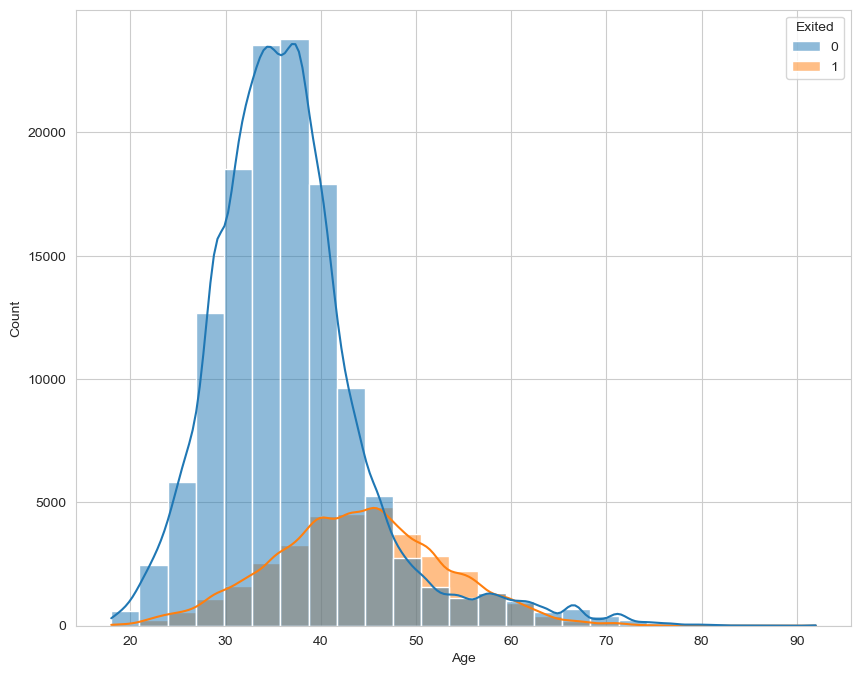

In [15]:
def draw_histplot(x, hue=None, figsize=(10, 8), bins=25):
    fig, ax = plt.subplots(figsize=figsize)
    sns.histplot(x=x, hue=hue, data=df, kde=True, bins=bins)
    plt.show()

draw_histplot('Age', 'Exited')  

- 전체 고객에서 30대가 가장 높은 비중을 차지함
- 50세를 전후한 나이에서 이탈 고객이 비이탈 고객보다 더 높은 숫자를 보임
 

In [16]:
df['age_to_cat'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_to_cat
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,30-40
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,30-40
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,30-40
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,30-40
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,30-40


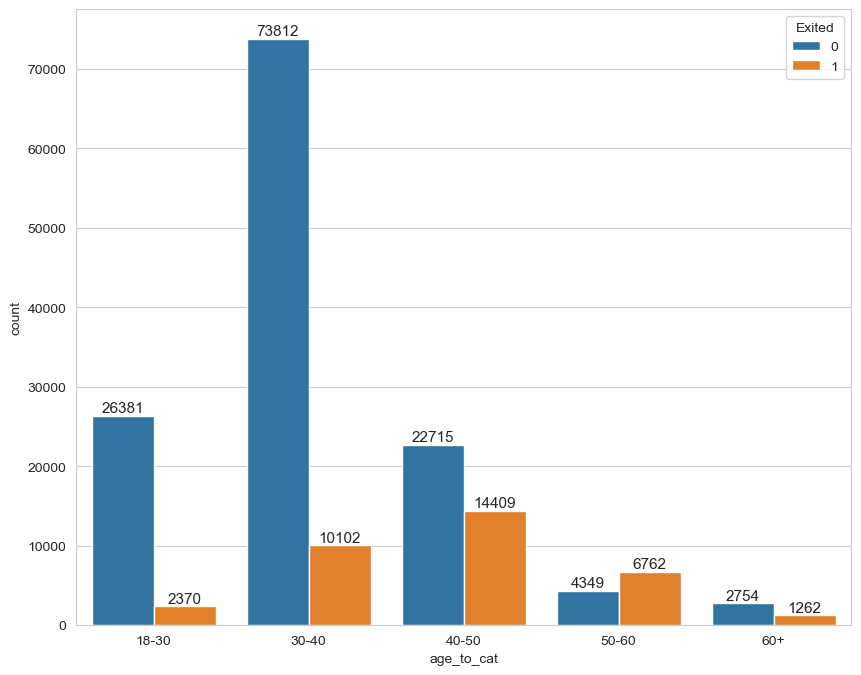

In [17]:
draw_countplot('age_to_cat', 'Exited') 

- 이탈 고객은 40대가 가장 많은데, 연령대별 고객 중 이탈 고객의 비율은 50대가 가장 높음
- 18~40세까지의 고객에 비해 그 보다 연령대가 높은 고객들의 이탈 비율이 높음

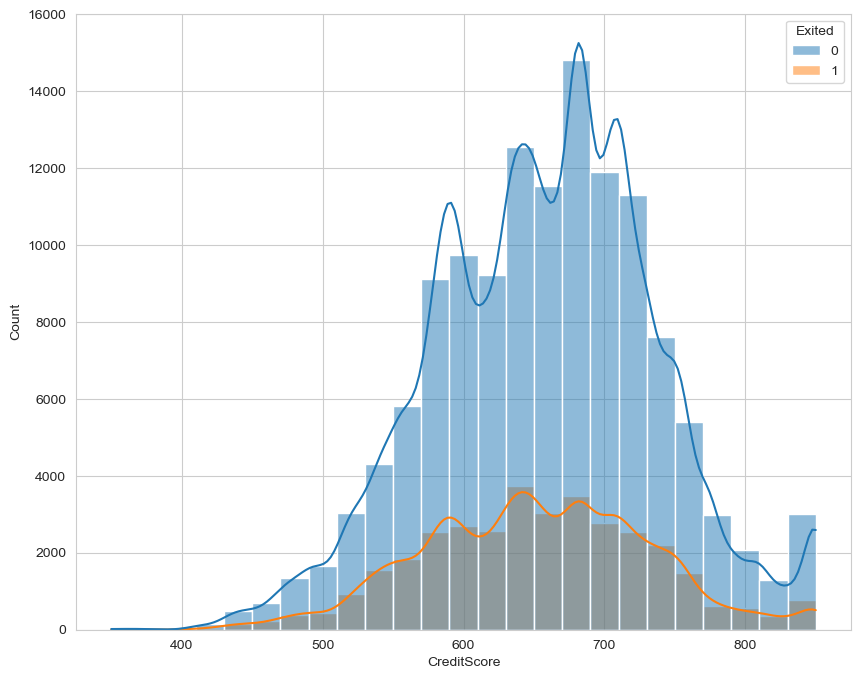

In [18]:
draw_histplot('CreditScore', 'Exited')

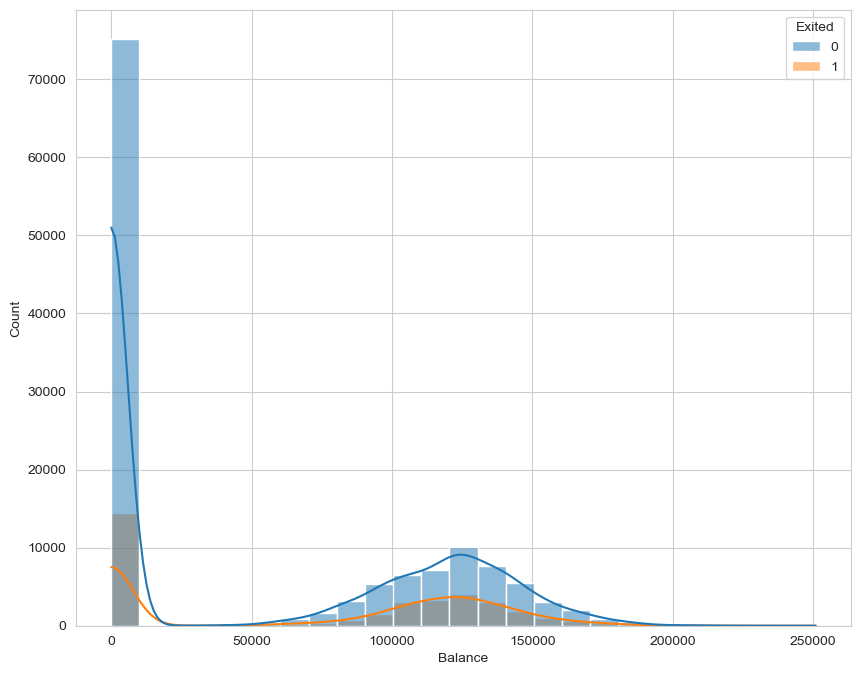

In [19]:
draw_histplot('Balance', 'Exited')

- 고객 중 다수가 매우 적은 잔고를 유지 중

In [34]:
len(df.query('(Balance < 50000) & (Exited == 1)')) / len(df.query('(Balance < 50000)'))

0.16196454208540617

In [35]:
len(df.query('(Balance >= 50000) & (Exited == 1)')) / len(df.query('(Balance >= 50000)'))

0.2709195142389699

- 잔고가 50000 이상인 고객의 이탈률이 더 높음

In [38]:
len(df.query('(Balance < 50000) & (Exited == 1)')) / len(df.query('Exited == 1'))

0.4167406431660033

- 하지만, 이탈 고객 중 41%가 잔고가 50000 미만임

In [32]:
df.query('(Balance < 50000) & (Exited == 0)')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_to_cat
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0,30-40
1,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0,30-40
2,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0,30-40
4,716,Spain,Male,33.0,5,0.0,2,1.0,1.0,15068.83,0,30-40
8,676,France,Male,43.0,4,0.0,2,1.0,0.0,142917.13,0,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...
165025,635,France,Female,38.0,9,0.0,2,1.0,1.0,167558.27,0,30-40
165028,630,France,Male,50.0,8,0.0,2,1.0,1.0,5962.50,0,40-50
165029,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0,30-40
165030,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0,30-40


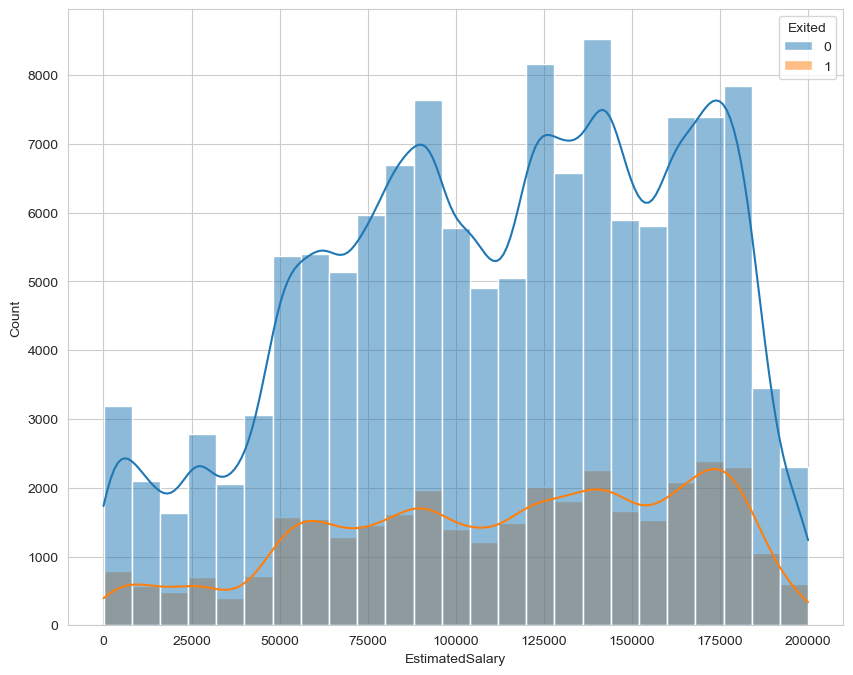

In [20]:
draw_histplot('EstimatedSalary', 'Exited')

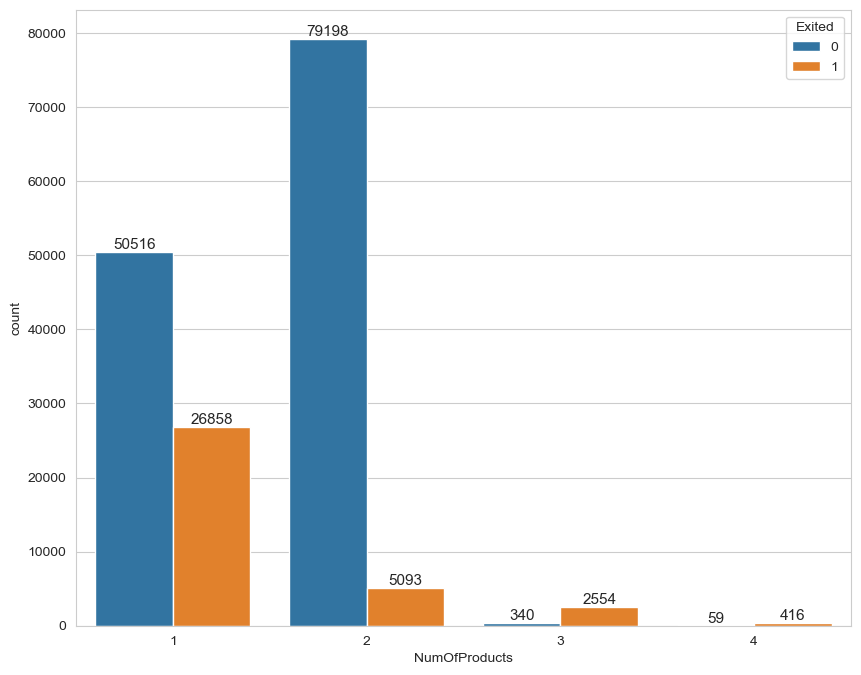

In [21]:
draw_countplot('NumOfProducts', 'Exited')

- 이용 상품이 많으면 은행의 충성 고객이라고 생각하기 쉬운데, 가입상품이 3, 4개인 고객들의 이탈비율이 더 높음. 다수의 상품을 이용하는 고객들은 재테크에 관심이 높다고 할 수 있는데, 이런 고객들이 상품 조건 등에 더 민감하게 반응해서 이탈했을 가능성이 있음. 통신사 사례에서도 비슷한 부분이 있었나?

- 이용 상품이 1개인 고객들을 2개로 만드는게 중요해 보임

C:\Users\mase8\AppData\Local\Temp\ipykernel_23736\2363355163.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', len(col1_values))


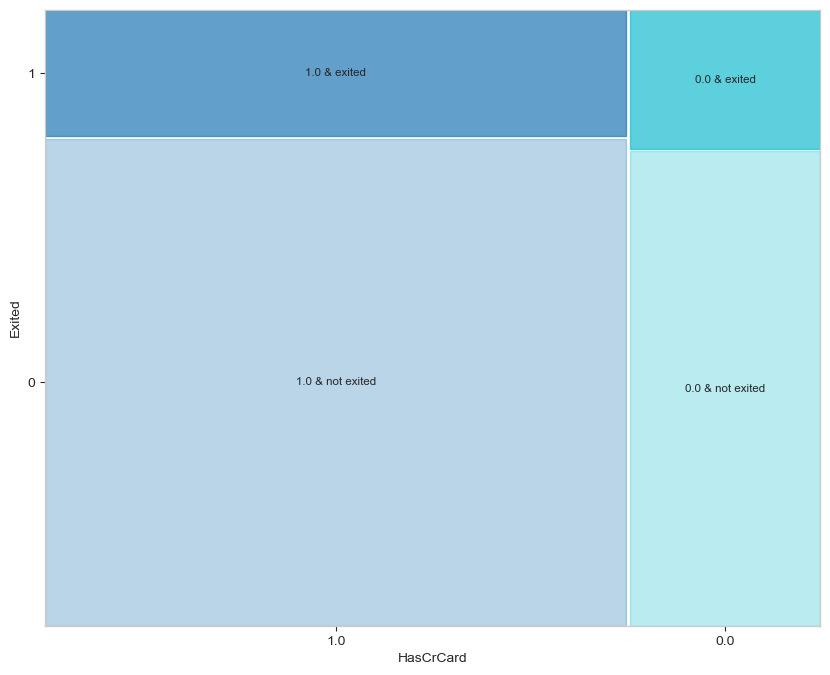

In [22]:
create_mosaic_plot(df, 'HasCrCard', 'Exited')

- 고객 중 다수가 신용카드 보유
- 신용카드 보유 여부가 이탈에 별다른 영향이 없어 보임

C:\Users\mase8\AppData\Local\Temp\ipykernel_23736\2363355163.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10', len(col1_values))


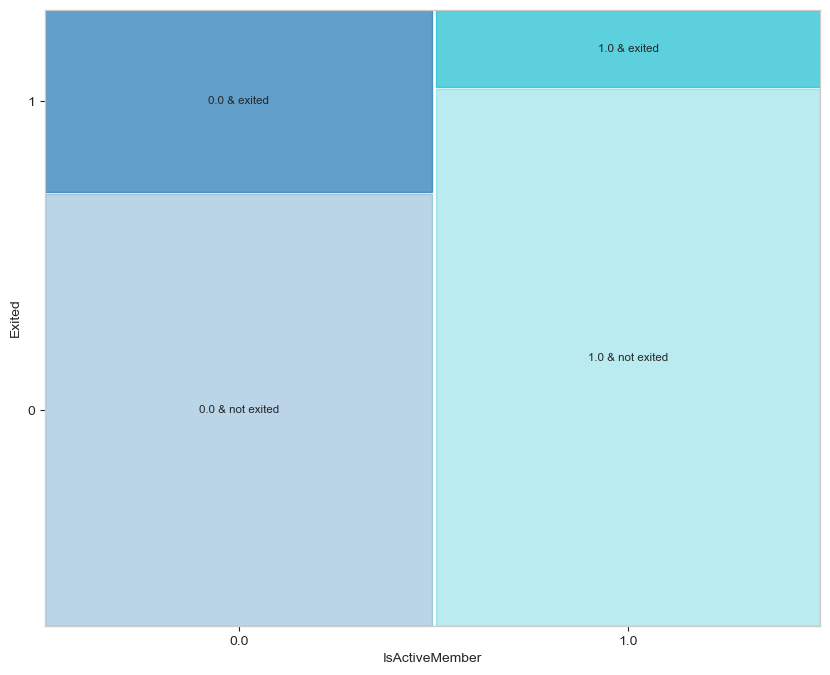

In [23]:
create_mosaic_plot(df, 'IsActiveMember', 'Exited')

- 활성 고객의 이탈 비율이 더 높음
- 비활성 고객의 경우, 이탈 여부를 판단하기 어려웠을 수 있음

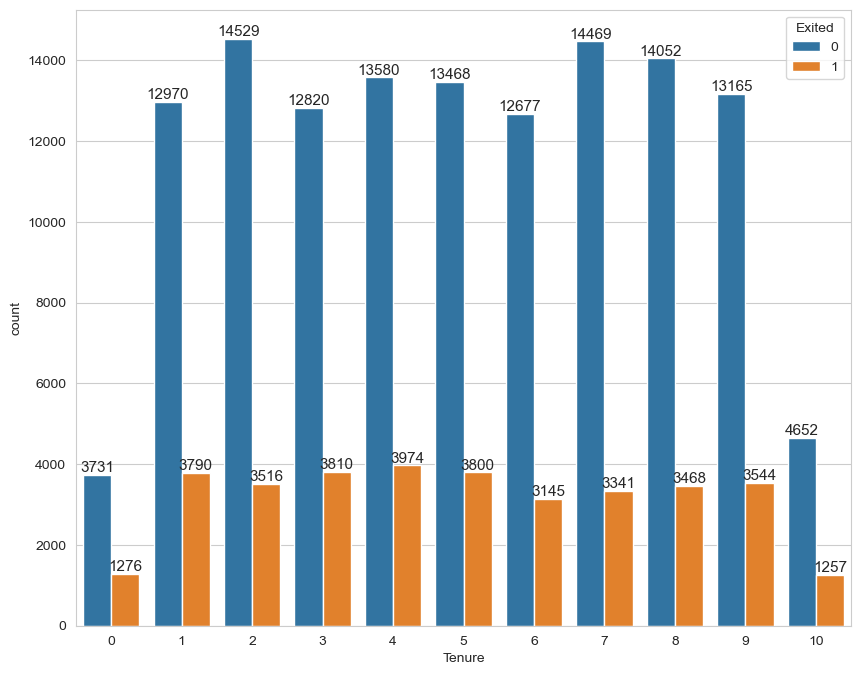

In [24]:
draw_countplot('Tenure', 'Exited')

> 시각화를 통해 확인했을 때, 
- Age, Gender, Geography, IsActiveMemeber, NumOfProducts 변수들은 이탈 여부에 영향이 있는 것으로 보임

## 박스 플랏

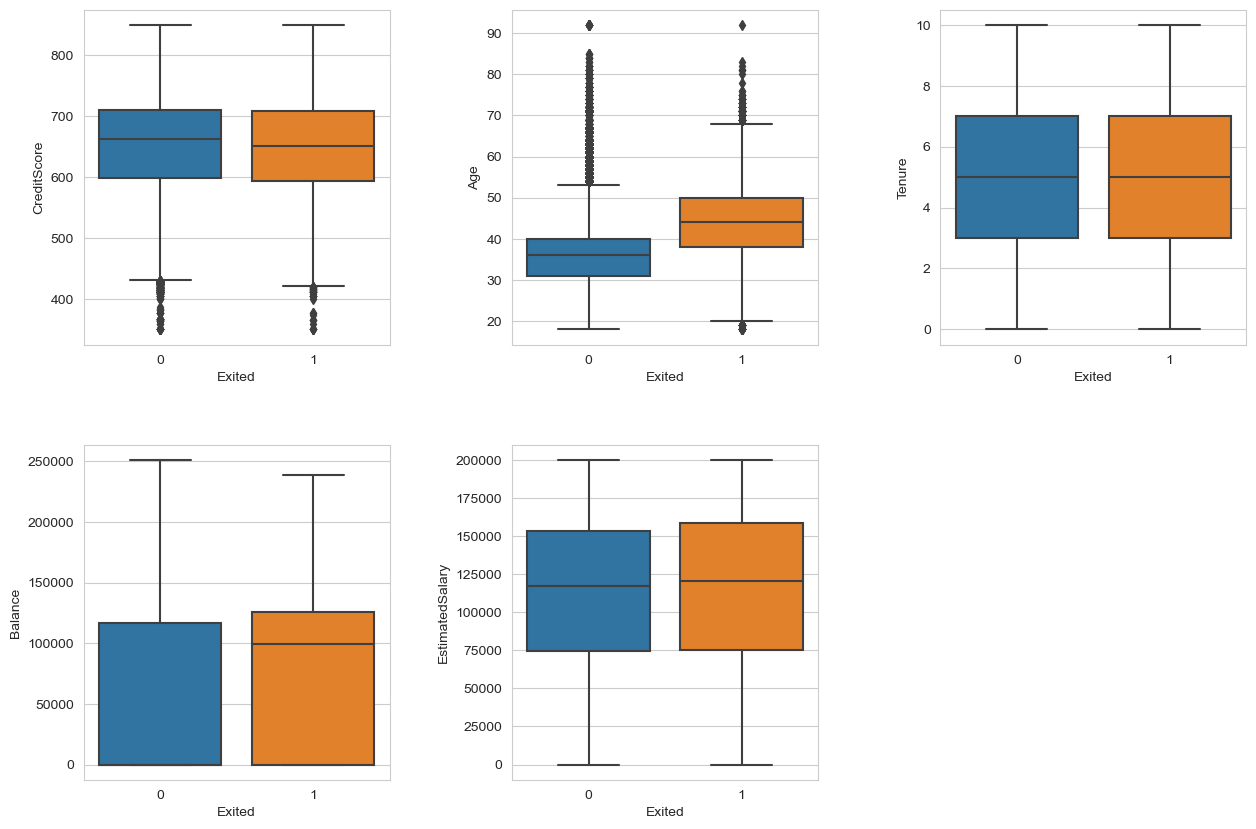

In [57]:
nrows = 2
ncols = 3
fig, ax, = plt.subplots(nrows, ncols, figsize = (15, 10))
sns.boxplot(data=df, x='Exited', y='CreditScore', ax=ax[0, 0])
sns.boxplot(data=df, x='Exited', y='Age', ax=ax[0, 1])
sns.boxplot(data=df, x='Exited', y='Tenure', ax=ax[0, 2])
sns.boxplot(data=df, x='Exited', y='Balance', ax=ax[1, 0])
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', ax=ax[1, 1])
ax[1, 2].set_visible(False)
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.show()

## 상관 계수 확인

- 수치형 데이터 먼저 확인

In [25]:
df_digit = df.select_dtypes(include=['int64', 'float64'])
df_digit.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0


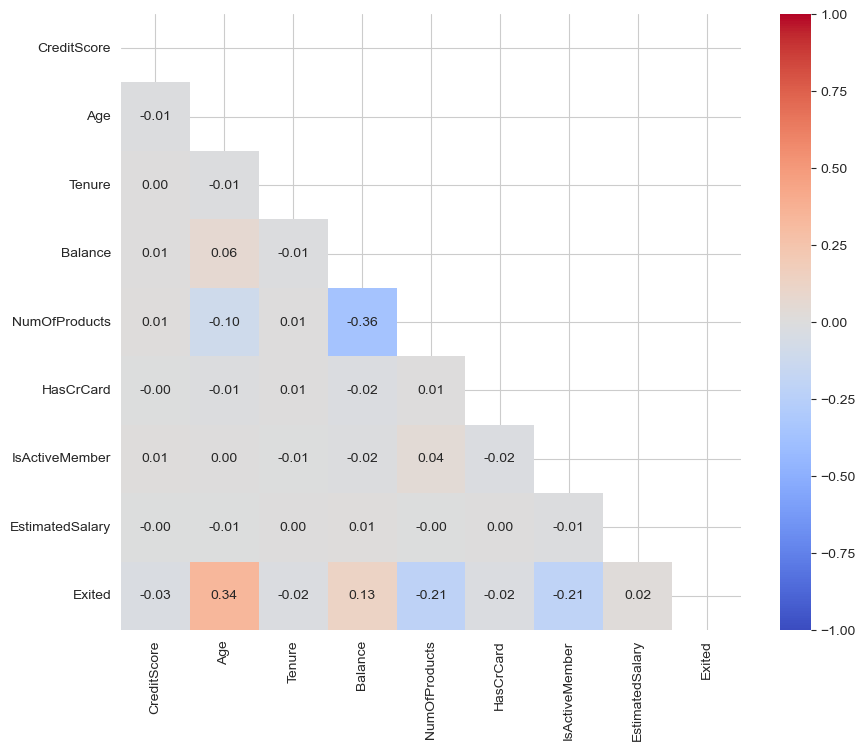

In [26]:
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df_digit.corr(), dtype=bool))
sns.heatmap(df_digit.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

> Age, Balance, NumOfProducts, IsActiveMember 컬럼의 상관계수가 눈에 띄임

- 범주형 컬럼의 상관계수 확인(factorize를 통해 대략적으로)

In [39]:
df_cat = df.select_dtypes(exclude=['int64', 'float64'])
df_cat.head()

,Geography,Gender,age_to_cat
0,France,Male,30-40
1,France,Male,30-40
2,France,Male,30-40
3,France,Male,30-40
4,Spain,Male,30-40


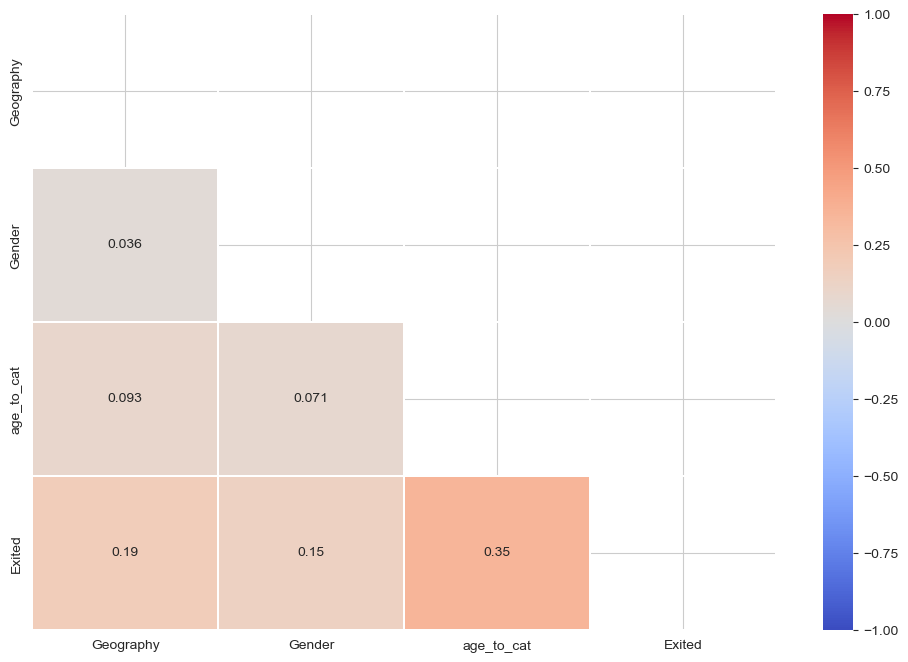

In [40]:
df_cat_corr = pd.concat([df_cat, df['Exited']], axis=1).apply(lambda x: pd.factorize(x)[0]).corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df_cat_corr, dtype=bool))
ax = sns.heatmap(df_cat_corr, mask=mask, xticklabels=df_cat_corr.columns, yticklabels=df_cat_corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

- age_to_cat은 시각화를 위해 Age 컬럼으로 만든 컬럼 => 모델링엔 둘 중 하나만 사용
- Geography와 Gender 모두 Exited와 약한 상관관계가 존재

# 인코딩

In [41]:
df_ohe = pd.get_dummies(df[['Geography', 'Gender']])
df_ohe.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,True,False,False,False,True
1,True,False,False,False,True
2,True,False,False,False,True
3,True,False,False,False,True
4,False,False,True,False,True


In [45]:
pre_ohe = df.drop(['Geography', 'Gender', 'age_to_cat'], axis=1)
data = pd.concat([pre_ohe, df_ohe], axis=1)
columns_order = [col for col in data.columns if col != 'Exited']
data = data[columns_order + ['Exited']]
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,True,False,False,False,True,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,True,False,False,False,True,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,True,False,False,False,True,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,True,False,False,False,True,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,False,False,True,False,True,0


# 모델링

## Logistic Regression

In [58]:
X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((132027, 13), (33007, 13), (132027,), (33007,))

In [59]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [60]:
lr_pred = lr.predict(X_val)
roc_auc_score(y_val, lr_pred)

0.5450222846901452

- 불균형 데이터 조정

In [62]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
roc_auc_score(y_val, lr.predict(X_val))

0.6814359777927967

In [63]:
smote = SMOTE(random_state=13)

X_ovr, y_ovr = smote.fit_resample(X_train, y_train)

In [65]:
X_ovr.shape, y_ovr.shape

((208122, 13), (208122,))

In [67]:
y_ovr.value_counts()

Exited
0    104061
1    104061
Name: count, dtype: int64

In [68]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_ovr, y_ovr)
roc_auc_score(y_val, lr.predict(X_val))

0.6830972490676447

## Decision Tree

In [81]:
dt = DecisionTreeClassifier(max_depth=3, random_state=13)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_val)
roc_auc_score(y_val, dt_pred)

0.6851649325360781

In [82]:
dt = DecisionTreeClassifier(max_depth=3, random_state=13, class_weight='balanced')
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_val)
roc_auc_score(y_val, dt_pred)

0.7719749573462708

In [84]:
dt = DecisionTreeClassifier(max_depth=3, random_state=13)
dt.fit(X_ovr, y_ovr)

dt_pred = dt.predict(X_val)
roc_auc_score(y_val, dt_pred)

0.7719749573462708

## Random Forest

In [69]:
rf = RandomForestClassifier(max_depth=3, random_state=13)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_val)
roc_auc_score(y_val, rf_pred)

0.5601406819717861

In [70]:
rf = RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=13)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_val)
roc_auc_score(y_val, rf_pred)

0.7724872684537467

In [71]:
rf = RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=13)
rf.fit(X_ovr, y_ovr)

rf_pred = rf.predict(X_val)
roc_auc_score(y_val, rf_pred)

0.7588850336709758

## LightGBM

In [72]:
lgbm = LGBMClassifier(max_depth=3, random_state=13)
lgbm.fit(X_train, y_train)

lgbm_pred = lgbm.predict(X_val)
roc_auc_score(y_val, lgbm_pred)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


0.7476709054931115

In [73]:
lgbm = LGBMClassifier(max_depth=3, random_state=13, class_weight='balanced')
lgbm.fit(X_train, y_train)

lgbm_pred = lgbm.predict(X_val)
roc_auc_score(y_val, lgbm_pred)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


0.8040179167186834

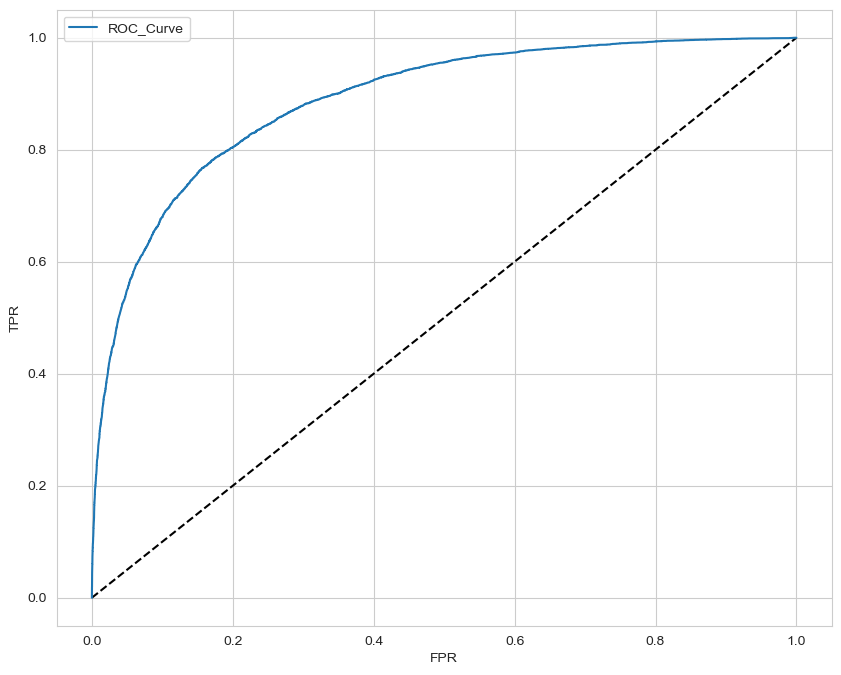

In [92]:
pred_proba = lgbm.predict_proba(X_val)[:, 1]
fpr, tpr, threshold = roc_curve(y_val, pred_proba)


plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], color='k', ls='dashed')
plt.plot(fpr, tpr, label='ROC_Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [76]:
lgbm = LGBMClassifier(max_depth=3, random_state=13, class_weight='balanced')
lgbm.fit(X_ovr, y_ovr)

lgbm_pred = lgbm.predict(X_val)
roc_auc_score(y_val, lgbm_pred)

[LightGBM] [Info] Number of positive: 104061, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1556
[LightGBM] [Info] Number of data points in the train set: 208122, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


0.7737078323582885

## XGBoost

In [78]:
xgb = XGBClassifier(max_depth=3, random_state=13)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_val)
roc_auc_score(y_val, xgb_pred)

0.7507856321863821

In [80]:
xgb = XGBClassifier(max_depth=3, random_state=13)
xgb.fit(X_ovr, y_ovr)

xgb_pred = xgb.predict(X_val)
roc_auc_score(y_val, xgb_pred)

0.7696444996419813

> 모델 성능
- 파이프라인과 그리드서치를 이용한 하이퍼 파라미터 튜닝이 필요하지만, 1차적으로는 LGBM > XGBoost = RandomForest = DecisionTree > LogistRegression 순의 성능을 보임
- LGBM과 XGBoost는 데이터 불균형의 영향이 커 보이지 않음
- 모델에 따라 SMOTE를 이용한 오버샘플링과 class_weight를 통한 조정 가운데 어느 것이 더 효과적인지는 달랐음
- 현재 리더보드에 랭크되어 있는 점수들은 0.88 수준